# The Customer Churn Prediction Project

## 3.1 Introduction

This project aims to determine customers that are likely to churn or stop uisng a telecom service. It involves using historic data 

## Data Preparation

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_colums = list(df.dtypes[df.dtypes == object].index)

for c in categorical_colums:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [5]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [8]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [10]:
df.totalcharges = df.totalcharges.fillna(0)

In [11]:
df.churn = (df.churn == 'yes').astype(int)

In [12]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


## Setting up the validation framework 

Perform the train/validation/test split with Scikit-Learn

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [15]:
df_train, df_val  = train_test_split(df_train_full, test_size = 0.25, random_state = 1)

In [16]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [19]:
del df_train['churn']
del df_val['churn']
del df_test['churn'] 

## EDA

* Missing values
* y variable (churn column)
* numerical and categorical variables

In [20]:
df_train_full = df_train_full.reset_index(drop=True)

In [21]:
df_train_full.churn.value_counts(normalize=True)  #Churn Rate

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [22]:
#Churn rate is the mean of the 1s, i.e no of 1s diveded by the total no of observation 

global_churn_rate = df_train_full.churn.mean()
round(global_churn_rate, 2)

0.27

In [23]:
df_train_full.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [24]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [25]:
df_train_full.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [26]:
categorical  = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [27]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance metric: Churn rate and risk ratio

Churn Rate

In [28]:
df_train_full.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [29]:
churn_female = df_train_full[df_train_full.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [30]:
churn_male = df_train_full[df_train_full.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [31]:
df_train_full.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [32]:
churn_partner = df_train_full[df_train_full.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [33]:
churn_no_partner = df_train_full[df_train_full.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [34]:
global_churn_rate - churn_no_partner

-0.05984095297455855

In [35]:
#if the difference between the global churn rate and group churn rate is greater
#than 1, that means that group is less likely to churn and if the diff is less than zero, negative
# the group is more likely to churn

risk ratio

In [36]:
churn_no_partner / global_churn_rate

#This means people with no partner, their churn rate is 22% higher

1.2216593879412643

In [37]:
churn_partner / global_churn_rate
#people with partner, their churn rate is 24% lower than the global rate

0.7594724924338315

In [38]:
#to calculate risk ratio, group churn rate divided by global churn rate
#if the result is more than 1 , then the group is more likely to churn
#if the result is less than 1 , then the group is less likely to churn

In [39]:
#Image(riskratio="C:\Users\Muibat Odunukan\Downloads\riskratio.jpg")

In [40]:
from IPython.display import display

In [41]:
for c in categorical:
    print(c)
    df_group = df_train_full.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print() #To act as line breaks/ spaces between outputs
    print() #To act as line breaks/ spaces between outputs

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## Feature Importance: Mutual Information

In [42]:
from sklearn.metrics import mutual_info_score

In [43]:
mutual_info_score(df_train_full.contract, df_train_full.churn)

0.0983203874041556

In [44]:
mutual_info_score(df_train_full.gender, df_train_full.churn)

0.0001174846211139946

In [45]:
mutual_info_score(df_train_full.contract, df_train_full.churn)

0.0983203874041556

In [46]:
mutual_info_score(df_train_full.partner, df_train_full.churn)

0.009967689095399745

In [47]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_train_full.churn)

In [48]:
mi = df_train_full[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature Importance: Correlation

Numeric columns
* Correlation coefficient 

In [49]:
df_train_full[numerical].corrwith(df.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [50]:
df_train_full[df_train_full.tenure <= 2].churn.mean()

0.5953420669577875

In [51]:
df_train_full[(df_train_full.tenure > 2) & (df_train_full.tenure <= 12)].churn.mean()

0.3994413407821229

In [52]:
df_train_full[df_train_full.tenure > 12].churn.mean()

0.17634908339788277

In [53]:
df_train_full[df_train_full.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [54]:
df_train_full[(df_train_full.monthlycharges > 20) & (df_train_full.tenure <= 50)].churn.mean()

0.372438955936009

In [55]:
df_train_full[df_train_full.monthlycharges > 50].churn.mean()

0.32499341585462205

## One-Hot Encoding
using scikit Learn

In [56]:
 from sklearn.feature_extraction import DictVectorizer

In [57]:
# Convert DataFrame to Dictionaries
# fit the DictVectorizer
# Based on the above, the one hot encoding feature matrix is created
# does not transform numeric data. It returns the input values

In [58]:
dv = DictVectorizer(sparse=False)

In [59]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [60]:
#fit and transform
X_train = dv.fit_transform(train_dicts)

In [1]:
#Repeat for val dataset, only transform, no fitting 

val_dicts = df_val[categorical + numerical].to_dict(orient='records')

NameError: name 'df_val' is not defined

In [62]:
X_val = dv.transform(val_dicts)

## Logistic Regression

* Binary classification
* Linear vs Logistic regression

In [63]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [64]:
z = np.linspace(-7, 7, 51)

In [65]:
sigmoid(10000)

1.0

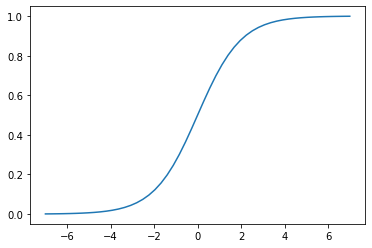

In [66]:
plt.plot(z, sigmoid(z))

In [67]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [68]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

##  Training Logistics regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
model.intercept_[0]

-0.10903312791499967

In [72]:
model.coef_[0] #.round(3)

array([ 4.74767656e-01, -1.74874818e-01, -4.07570793e-01, -2.96950409e-02,
       -7.79829132e-02,  6.26801270e-02, -8.89691119e-02, -8.13889693e-02,
       -3.43091709e-02, -7.33687833e-02, -3.35220070e-01,  3.16511228e-01,
       -8.89691119e-02,  3.67402198e-03, -2.58135099e-01,  1.41453271e-01,
        9.00387431e-03,  6.25283154e-02, -8.89691119e-02, -8.12371577e-02,
        2.65585235e-01, -8.89691119e-02, -2.84294077e-01, -2.31193901e-01,
        1.23515947e-01, -1.66032497e-01,  5.83545426e-02, -8.70102006e-02,
       -3.20547907e-02,  7.04700976e-02, -5.90830603e-02,  1.41453271e-01,
       -2.49131225e-01,  2.15478904e-01, -1.20373243e-01, -8.89691119e-02,
        1.01664401e-01, -7.08996652e-02, -8.89691119e-02,  5.21908230e-02,
        2.13372928e-01, -8.89691119e-02, -2.32081770e-01, -7.04059682e-02,
        3.82383774e-04])

In [73]:
y_pred = model.predict_proba(X_val)[:, 1]

In [74]:
churn_decision = y_pred >= 0.5

In [75]:
df_val[churn_decision].customerid 

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [76]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [77]:
churn_decision.astype(int)


array([0, 0, 0, ..., 0, 1, 1])

In [78]:
#model accuracy

(y_val == churn_decision).mean()

0.8034066713981547

In [79]:
#explanantion of the churn_decision mean calculation

df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [80]:
df_pred

,probability,prediction,actual
0,0.008997,0,0
1,0.204531,0,0
2,0.212228,0,0
3,0.543029,1,1
4,0.213788,0,0
...,...,...,...
1404,0.313685,0,0
1405,0.039358,0,1
1406,0.136387,0,0
1407,0.799761,1,1


In [81]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [82]:
df_pred['correct'].mean()

0.8034066713981547

## Model Interpretation

* Look at the coefficients
* Train a similar model with fewer features

In [83]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [84]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [85]:
list(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

[('contract=month-to-month', 0.475),
 ('contract=one_year', -0.175),
 ('contract=two_year', -0.408),
 ('dependents=no', -0.03),
 ('dependents=yes', -0.078),
 ('deviceprotection=no', 0.063),
 ('deviceprotection=no_internet_service', -0.089),
 ('deviceprotection=yes', -0.081),
 ('gender=female', -0.034),
 ('gender=male', -0.073),
 ('internetservice=dsl', -0.335),
 ('internetservice=fiber_optic', 0.317),
 ('internetservice=no', -0.089),
 ('monthlycharges', 0.004),
 ('multiplelines=no', -0.258),
 ('multiplelines=no_phone_service', 0.141),
 ('multiplelines=yes', 0.009),
 ('onlinebackup=no', 0.063),
 ('onlinebackup=no_internet_service', -0.089),
 ('onlinebackup=yes', -0.081),
 ('onlinesecurity=no', 0.266),
 ('onlinesecurity=no_internet_service', -0.089),
 ('onlinesecurity=yes', -0.284),
 ('paperlessbilling=no', -0.231),
 ('paperlessbilling=yes', 0.124),
 ('partner=no', -0.166),
 ('partner=yes', 0.058),
 ('paymentmethod=bank_transfer_(automatic)', -0.087),
 ('paymentmethod=credit_card_(automa

In [86]:
small = ['contract', 'tenure', 'monthlycharges']
df_train[small]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


In [87]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [88]:
train_small_dicts = df_train[small].to_dict(orient='records')
val_small_dicts = df_val[small].to_dict(orient='records')

In [89]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_small_dicts)

DictVectorizer(sparse=False)

In [90]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [91]:
X_train_small = dv_small.transform(train_dicts)

In [92]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [93]:
w0 = model_small.intercept_[0]
w0

-2.4767756600250475

In [94]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [95]:
dict(zip(dv_small.get_feature_names_out(),model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [96]:
(-2.47 + (-0.949) + 30*0.027 + 24* (-0.036))

-3.473

In [97]:
sigmoid(_)

0.030090303318277657

## Using the Model

In [98]:
dicts_full_train = df_train_full[categorical + numerical].to_dict(orient='records')

In [99]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [100]:
y_full_train = df_train_full.churn.values

In [101]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

Repeat the same process for test dataset

In [102]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [103]:
X_test = dv.transform(dicts_test)

In [108]:
#Predicting churn probabilities

y_pred = model.predict_proba(X_test)[:,1]

In [110]:
#Prediction decision 

churn_decision = (y_pred >=0.5)

In [111]:
#Calculating accuracy of our model
(churn_decision ==y_test).mean()

0.815471965933286

In [119]:
customer = dicts_test[-1]
customer 

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

using this model on customer 10 of test dataset

In [120]:
X_small = dv.transform([customer])
X_small

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03]])

In [121]:
model.predict_proba(X_small)[:,1]

array([0.59688521])

In [123]:
y_test[-1]

1